In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
customers['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

In [7]:
products['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [11]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [12]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [13]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [14]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [15]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [16]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [17]:
customers.duplicated().sum()

0

In [18]:
products.duplicated().sum()

0

In [19]:
transactions.duplicated().sum()

0

In [20]:
customers['SignupDate']= pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate']= pd.to_datetime(transactions['TransactionDate'])

In [21]:
customers['SignupDate'].dtypes

dtype('<M8[ns]')

In [22]:
transactions['TransactionDate'].dtypes

dtype('<M8[ns]')

1.No Duplicates Found in any dataset.

2.SignupDate in the Customers dataset and TransactionDate in the Transactions dataset are successfully converted to datetime format.

#### Exploratory Data Analysis

* Customer Analysis:

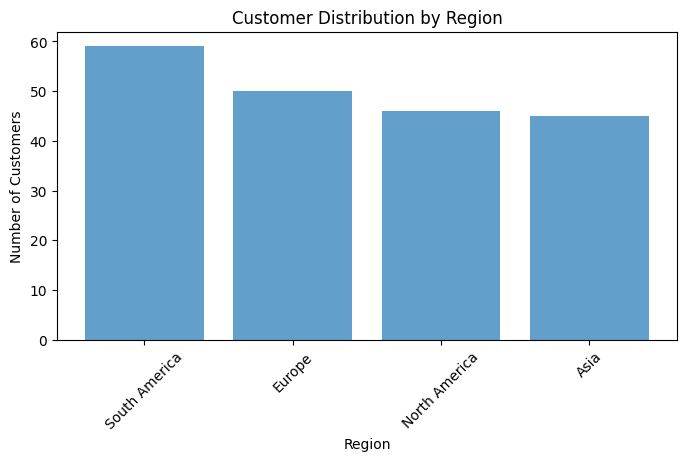

In [23]:
customers_region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8,4))
plt.bar(customers_region_counts.index, customers_region_counts.values, alpha=0.7, label='Customer Distribution by Region')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

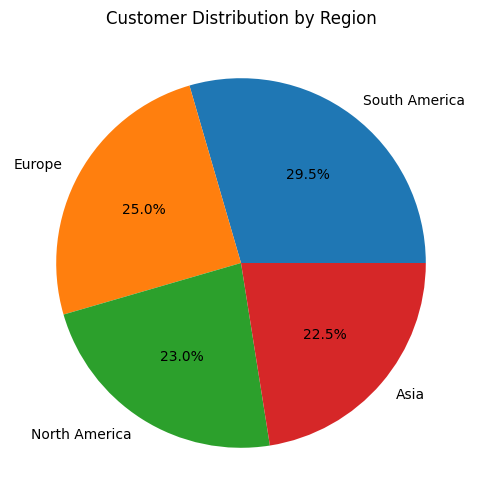

In [24]:
customers_region_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Customer Distribution by Region')
plt.ylabel('')
plt.show()

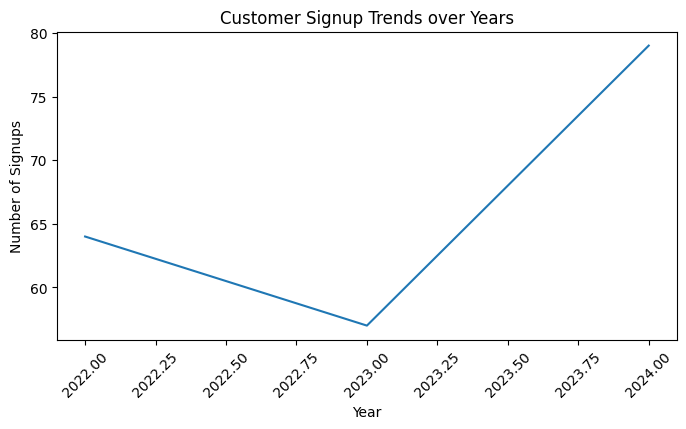

In [25]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(8,4))
signup_trends.plot(kind = 'line')
plt.title('Customer Signup Trends over Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation = 45)
plt.show()

* Product Analysis:

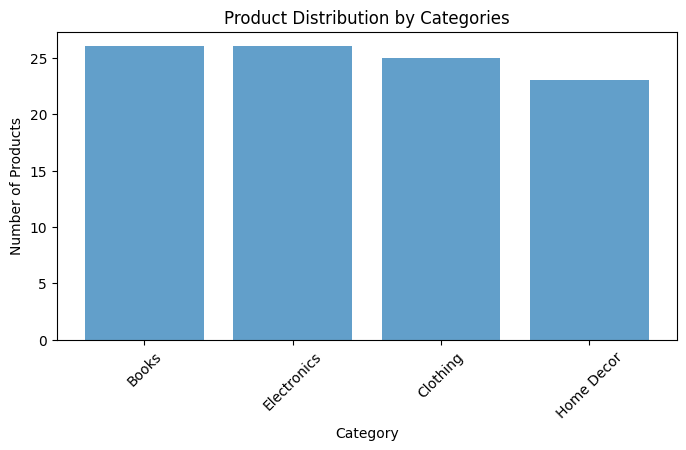

In [26]:
products_category_counts = products['Category'].value_counts()
plt.figure(figsize=(8,4))
plt.bar(products_category_counts.index,products_category_counts.values,alpha=0.7,label='Product Distribution by Category')
plt.title('Product Distribution by Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

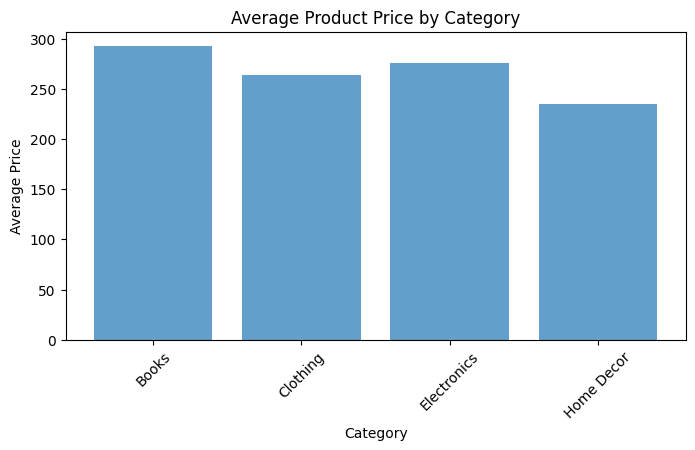

In [27]:
average_price_per_category = products.groupby('Category')['Price'].mean()
plt.figure(figsize=(8,4))
plt.bar(average_price_per_category.index,average_price_per_category.values,alpha=0.7,label=('Average Product Price by Category'))
plt.title('Average Product Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

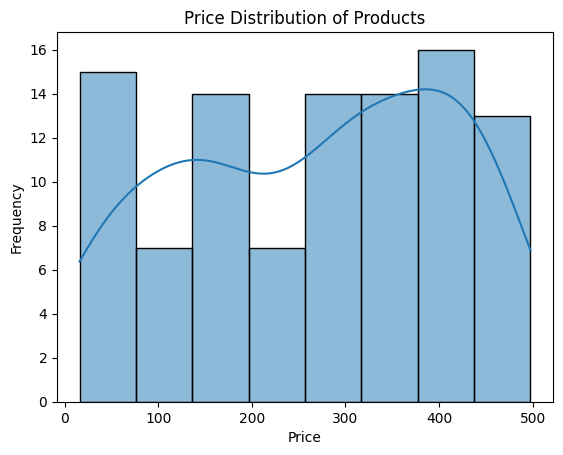

In [28]:
sns.histplot(products['Price'],kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Key Observations 
##### 1.Customer Distribution by region:
* The dataset shows customer counts across different regions. Certain regions have a significantly higher customer count thant others.Like South America has 59 customers but as compared to Asia that only has 45 customers.
##### 2. Product Distribution by Category:
* The majority of products are concentrated in a few specific categories, indicating possible focus areas for the eCommerce Platform. For example - Books.
##### 3. Average Product Price by Category:
* The average price varies significantly across categories. Some categories, such as electronics or premium items, have noticeably higher average prices.


#### Transaction Analysis

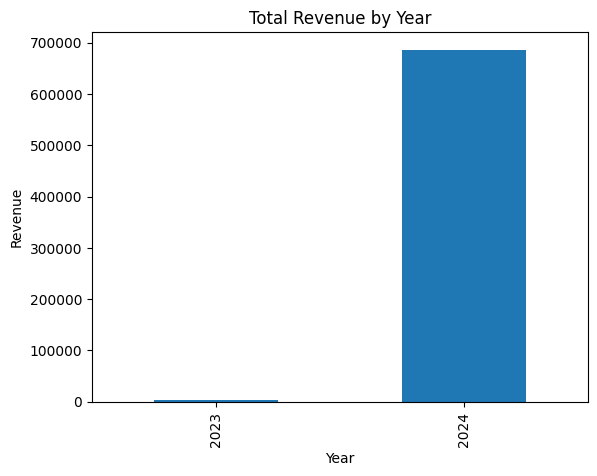

In [29]:
transactions['Year'] = transactions['TransactionDate'].dt.year
revenue_by_year = transactions.groupby('Year')['TotalValue'].sum()
revenue_by_year.plot(kind='bar')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

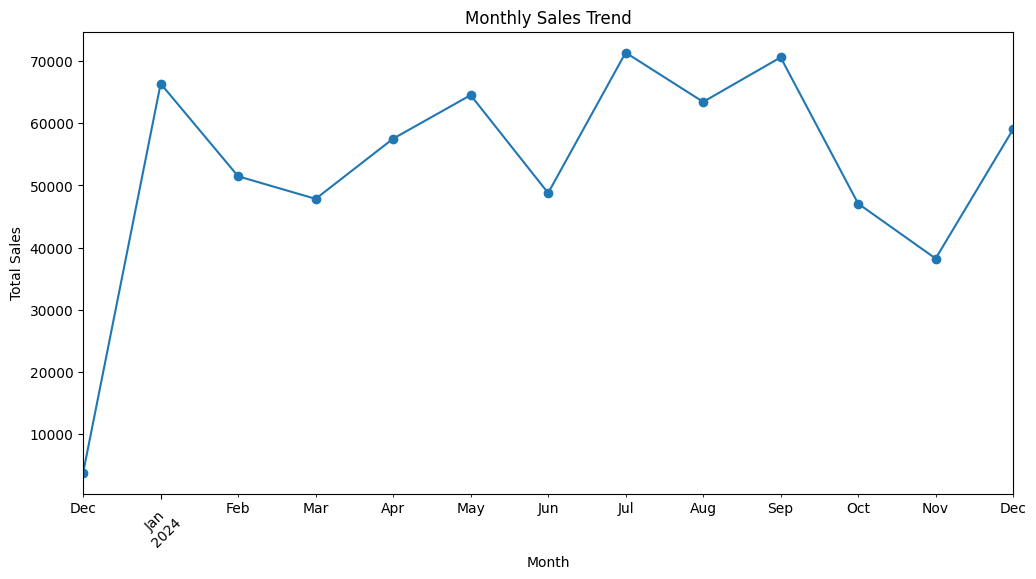

In [30]:
transactions['YearMonth']=transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line',marker='o',title='Monthly Sales Trend',xlabel='Month',ylabel='Total Sales')
plt.xticks(rotation=45)
plt.show()

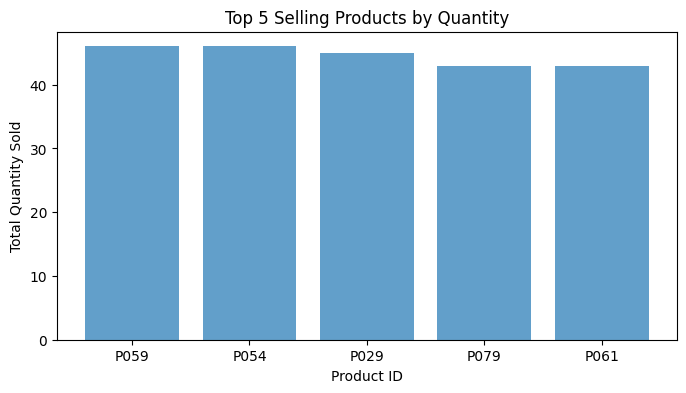

In [31]:
top_selling_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).nlargest(5)
plt.figure(figsize=(8,4))
plt.bar(top_selling_products.index,top_selling_products.values,alpha = 0.7,label='Top Selling Products')
plt.title('Top 5 Selling Products by Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()

In [32]:
top_selling_product_details = products[products['ProductID'].isin(top_selling_products.index)]
top_selling_product_details

,ProductID,ProductName,Category,Price
28,P029,TechPro Headphones,Electronics,433.64
53,P054,SoundWave Cookbook,Books,57.30
58,P059,SoundWave Jeans,Clothing,303.20
60,P061,HomeSense Desk Lamp,Home Decor,156.96
78,P079,ActiveWear Rug,Home Decor,417.37


### Observations from Transactions Data:
##### 1. Monthly Sales Trend:
* Sales fluctuate over time, with certain months showing high rise in total revenue. This could be due to seasonal trends or promotional campaigns.
##### 2. Top-Selling Products:
* The top 5 best-Selling products by quantity are:
    * TechPro Headphones-Electronics
    * SoundWave Cookbook-Books
    * SoundWave Jeans-Clothing
    * HomeSense Desk Lamp-Home Decor
    * ActiveWear Rug-Home Decor

These products are from a different categories, which indicates diverse customer interests.

In [33]:
merged_data = transactions.merge(customers, on='CustomerID')
merged_data = merged_data.merge(products,on='ProductID')

In [34]:
def exploring_business_insights(merged_data):
    insights = []
    regional_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending= False)
    insights.append(f"Regional Sales Distribution: {regional_sales.index[0]} leads in total sales with ${regional_sales.values[0]:,.2f}")

    category_performance = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending= False)
    insights.append(f"Product Category Performance: {category_performance.index[0]} category generated the highest revenue at ${category_performance.values[0]:}")

    insights.append(f"Customer Acquisition Trend: Peak signup year was { signup_trends.index[signup_trends.argmax()]} with {signup_trends.max()} new customers")
    
    avg_transaction_value = merged_data['TotalValue'].mean()
    insights.append(f"Average Transaction Value: ${avg_transaction_value:} per transaction")

    top_products_ = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(5)
    top_products_names = top_products_.index.tolist()
    insights.append(f"Top Selling Products: {', '.join(top_products_names)} are the most frequently purchased items")

    return insights

business_insights = exploring_business_insights(merged_data)
for i, insight in enumerate(business_insights, 1):
    print(f"Insight {i}: {insight}")

Insight 1: Regional Sales Distribution: South America leads in total sales with $219,352.56
Insight 2: Product Category Performance: Books category generated the highest revenue at $192147.47
Insight 3: Customer Acquisition Trend: Peak signup year was 2024 with 79 new customers
Insight 4: Average Transaction Value: $689.9955600000001 per transaction
Insight 5: Top Selling Products: ActiveWear Smartwatch, SoundWave Headphones, HomeSense Desk Lamp, ActiveWear Rug, SoundWave Cookbook are the most frequently purchased items
